# Import the Libraries


In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load data

In [20]:
df = pd.read_csv('data.csv',low_memory=False)

In [21]:
df.head()

,sc,style,buyer,smv,working_hrs,line_balance_count,othrs,produce_mins,use_mins,location,...,plan_smv,plan_efficiency,sec_id,shift,date_time,timestamp,orderType,aql_fail,cni_fail,prod_day
0,NaN,HeatSeal,HeatSeal,0.08,540.0,1.0,0.0,169.36,540.0,30,...,1.0,1.0,453.0,NaN,27/01/2021 0:00,27/01/2021 0:00,NaN,NaN,NaN,NaN
1,NaN,HeatSeal,HeatSeal,0.08,540.0,3.0,363.6,289.76,1983.0,30,...,1.0,1.0,453.0,NaN,28/01/2021 0:00,28/01/2021 0:00,NaN,NaN,NaN,NaN
2,NaN,HeatSeal,HeatSeal,0.08,480.0,2.0,0.0,180.96,960.0,30,...,1.0,1.0,449.0,NaN,29/01/2021 0:00,29/01/2021 0:00,NaN,NaN,NaN,NaN
3,NaN,HeatSeal,HeatSeal,0.08,540.0,3.0,0.0,174.56,1620.0,30,...,1.0,1.0,449.0,NaN,30/01/2021 0:00,30/01/2021 0:00,NaN,NaN,NaN,NaN
4,NaN,HeatSeal,HeatSeal,0.08,480.0,2.0,0.0,157.28,960.0,30,...,1.0,1.0,449.0,NaN,1/2/2021 0:00,1/2/2021 0:00,NaN,NaN,NaN,NaN


In [22]:
df.shape

(334156, 26)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334156 entries, 0 to 334155
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sc                  330493 non-null  float64
 1   style               334156 non-null  object 
 2   buyer               334156 non-null  object 
 3   smv                 334156 non-null  float64
 4   working_hrs         334156 non-null  float64
 5   line_balance_count  334156 non-null  float64
 6   othrs               334156 non-null  float64
 7   produce_mins        334156 non-null  float64
 8   use_mins            334156 non-null  float64
 9   location            334156 non-null  int64  
 10  create_date         334115 non-null  object 
 11  line_no             334109 non-null  object 
 12  actual_efficiency   334156 non-null  float64
 13  pqty                330333 non-null  float64
 14  component           334155 non-null  object 
 15  plan_qty            319452 non-nul

In [24]:
df.isnull().sum()

sc                      3663
style                      0
buyer                      0
smv                        0
working_hrs                0
line_balance_count         0
othrs                      0
produce_mins               0
use_mins                   0
location                   0
create_date               41
line_no                   47
actual_efficiency          0
pqty                    3823
component                  1
plan_qty               14704
plan_smv                   0
plan_efficiency            0
sec_id                     1
shift                 184212
date_time              80922
timestamp             171180
orderType             298852
aql_fail              331588
cni_fail              333627
prod_day              334124
dtype: int64

In [33]:
df1 = df.drop(['sc','buyer','othrs','pqty','plan_qty','sec_id','shift','timestamp','aql_fail','cni_fail','prod_day','orderType'], axis=1)

In [34]:
df2 = df1.dropna()
df2

,style,smv,working_hrs,line_balance_count,produce_mins,use_mins,location,create_date,line_no,actual_efficiency,component,plan_smv,plan_efficiency,date_time
0,HeatSeal,0.08,540.0,1.0,169.36,540.0,30,26/01/2021,HeatSeal,31.36300,HeatSeal,1.0,1.0,27/01/2021 0:00
1,HeatSeal,0.08,540.0,3.0,289.76,1983.0,30,27/01/2021,HeatSeal,14.61220,HeatSeal,1.0,1.0,28/01/2021 0:00
2,HeatSeal,0.08,480.0,2.0,180.96,960.0,30,28/01/2021,HeatSeal,18.85000,HeatSeal,1.0,1.0,29/01/2021 0:00
3,HeatSeal,0.08,540.0,3.0,174.56,1620.0,30,29/01/2021,HeatSeal,10.77530,HeatSeal,1.0,1.0,30/01/2021 0:00
4,HeatSeal,0.08,480.0,2.0,157.28,960.0,30,30/01/2021,HeatSeal,16.38330,HeatSeal,1.0,1.0,1/2/2021 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334151,DRY3-BLK-T61-7767C-SP21,7.26,540.0,5.0,3993.00,2700.0,32,19/11/2020,Line -04C,147.88900,High leg,1.0,1.0,20/11/2020 0:00
334152,DRY3-BLK-T61-7767C-SP21,7.26,540.0,10.0,2983.86,5400.0,32,20/11/2020,Line -04C,55.25670,High leg,1.0,1.0,23/11/2020 0:00
334153,DRY3-BLK-T61-7767C-SP21,7.26,540.0,10.0,232.32,5400.0,32,24/11/2020,Line -04C,4.30222,High leg,1.0,1.0,25/11/2020 0:00
334154,DRY3-BLK-T61-7767C-SP21,7.26,540.0,5.0,907.50,2700.0,32,27/11/2020,Line -04C,33.61110,High leg,1.0,1.0,30/11/2020 0:00


In [35]:
filter_negative_values = ['smv', 'working_hrs', 'produce_mins','line_balance_count','use_mins','actual_efficiency','plan_smv','plan_efficiency']
df3 = df2[(df2[filter_negative_values] >= 0).all(axis=1)].reset_index(drop=True)
df3

,style,smv,working_hrs,line_balance_count,produce_mins,use_mins,location,create_date,line_no,actual_efficiency,component,plan_smv,plan_efficiency,date_time
0,HeatSeal,0.08,540.0,1.0,169.36,540.0,30,26/01/2021,HeatSeal,31.36300,HeatSeal,1.0,1.0,27/01/2021 0:00
1,HeatSeal,0.08,540.0,3.0,289.76,1983.0,30,27/01/2021,HeatSeal,14.61220,HeatSeal,1.0,1.0,28/01/2021 0:00
2,HeatSeal,0.08,480.0,2.0,180.96,960.0,30,28/01/2021,HeatSeal,18.85000,HeatSeal,1.0,1.0,29/01/2021 0:00
3,HeatSeal,0.08,540.0,3.0,174.56,1620.0,30,29/01/2021,HeatSeal,10.77530,HeatSeal,1.0,1.0,30/01/2021 0:00
4,HeatSeal,0.08,480.0,2.0,157.28,960.0,30,30/01/2021,HeatSeal,16.38330,HeatSeal,1.0,1.0,1/2/2021 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252971,DRY3-BLK-T61-7767C-SP21,7.26,540.0,5.0,3993.00,2700.0,32,19/11/2020,Line -04C,147.88900,High leg,1.0,1.0,20/11/2020 0:00
252972,DRY3-BLK-T61-7767C-SP21,7.26,540.0,10.0,2983.86,5400.0,32,20/11/2020,Line -04C,55.25670,High leg,1.0,1.0,23/11/2020 0:00
252973,DRY3-BLK-T61-7767C-SP21,7.26,540.0,10.0,232.32,5400.0,32,24/11/2020,Line -04C,4.30222,High leg,1.0,1.0,25/11/2020 0:00
252974,DRY3-BLK-T61-7767C-SP21,7.26,540.0,5.0,907.50,2700.0,32,27/11/2020,Line -04C,33.61110,High leg,1.0,1.0,30/11/2020 0:00


In [36]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot a histogram of the target variable
# sns.histplot(df3['actual efficiency'], kde=False)
# plt.xlabel('actual efficiency')
# plt.ylabel('Count')
# plt.title('Distribution of Efficiency')
# plt.show()

# # Plot scatter plots of each independent variable against the target variable
# sns.pairplot(df3, x_vars=['smv', 'working hrs', 'produce mins', 'use mins'], y_vars='actual efficiency')
# plt.show()


In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the categorical columns
df3['style'] = le.fit_transform(df3['style'])
df3['component'] = le.fit_transform(df3['component'])
df3['line no'] = le.fit_transform(df3['line_no'])
df3['date time'] = le.fit_transform(df3['date_time'])


# Print the updated DataFrame
print(df3.head())

   style   smv  working_hrs  line_balance_count  produce_mins  use_mins  \
0   1325  0.08        540.0                 1.0        169.36     540.0   
1   1325  0.08        540.0                 3.0        289.76    1983.0   
2   1325  0.08        480.0                 2.0        180.96     960.0   
3   1325  0.08        540.0                 3.0        174.56    1620.0   
4   1325  0.08        480.0                 2.0        157.28     960.0   

   location create_date   line_no  actual_efficiency  component  plan_smv  \
0        30  26/01/2021  HeatSeal            31.3630        265       1.0   
1        30  27/01/2021  HeatSeal            14.6122        265       1.0   
2        30  28/01/2021  HeatSeal            18.8500        265       1.0   
3        30  29/01/2021  HeatSeal            10.7753        265       1.0   
4        30  30/01/2021  HeatSeal            16.3833        265       1.0   

   plan_efficiency        date_time  line no  date time  
0              1.0  27/01/20

In [38]:
# # Perform feature engineering on the 4 independent variables
# import numpy as np
# # 1. Create interaction terms between the independent variables
# df3["smv_working_hrs"] = df3["smv"] * df3["working hrs"]
# df3["smv_produce_mins"] = df3["smv"] * df3["produce mins"]
# df3["smv_use_mins"] = df3["smv"] * df3["use mins"]
# df3["working_hrs_produce_mins"] = df3["working hrs"] * df3["produce mins"]
# df3["working_hrs_use_mins"] = df3["working hrs"] * df3["use mins"]
# df3["produce_mins_use_mins"] = df3["produce mins"] * df3["use mins"]

# # 2. Take the logarithm of the independent variables
# df3["log_smv"] = np.log(df3["smv"])
# df3["log_working_hrs"] = np.log(df3["working hrs"])
# df3["log_produce_mins"] = np.log(df3["produce mins"])
# df3["log_use_mins"] = np.log(df3["use mins"])

# # 3. Normalize the independent variables
# df3["smv_normalized"] = (df3["smv"] - df3["smv"].mean()) / df3["smv"].std()
# df3["working_hrs_normalized"] = (df3["working hrs"] - df3["working hrs"].mean()) / df3["working hrs"].std()
# df3["produce_mins_normalized"] = (df3["produce mins"] - df3["produce mins"].mean()) / df3["produce mins"].std()
# df3["use_mins_normalized"] = (df3["use mins"] - df3["use mins"].mean()) / df3["use mins"].std()

# # 4. Create polynomial terms with the independent variables
# df3["smv_2"] = df3["smv"] ** 2
# df3["working_hrs_2"] = df3["working hrs"] ** 2
# df3["produce_mins_2"] = df3["produce mins"] ** 2
# df3["use_mins_2"] = df3["use mins"] ** 2
# df3["smv_3"] = df3["smv"] ** 3
# df3["working_hrs_3"] = df3["working hrs"] ** 3
# df3["produce_mins_3"] = df3["produce mins"] ** 3
# df3["use_mins_3"] = df3["use mins"] ** 3

# # Store the feature-engineered data in a new DataFrame
# engineered_data = df3.drop(["smv", "working hrs", "produce mins", "use mins"], axis=1)

In [39]:
# Perform feature engineering on the 5 independent variables

# 1. Create interaction terms between the independent variables
df3["smv_use_mins"] = df3["smv"] * df3["use_mins"]
df3["smv_working_hrs"] = df3["smv"] * df3["working_hrs"]
df3["use_mins_working_hrs"] = df3["use_mins"] * df3["working_hrs"]

# 2. Take the logarithm of the independent variables
df3["log_smv"] = np.log(df3["smv"])
df3["log_use_mins"] = np.log(df3["use_mins"])
df3["log_working_hrs"] = np.log(df3["working_hrs"])

# 3. Normalize the independent variables
df3["smv_normalized"] = (df3["smv"] - df3["smv"].mean()) / df3["smv"].std()
df3["use_mins_normalized"] = (df3["use_mins"] - df3["use_mins"].mean()) / df3["use_mins"].std()
df3["working_hrs_normalized"] = (df3["working_hrs"] - df3["working_hrs"].mean()) / df3["working_hrs"].std()

# 4. Create polynomial terms with the independent variables
df3["smv_2"] = df3["smv"] ** 2
df3["use_mins_2"] = df3["use_mins"] ** 2
df3["working_hrs_2"] = df3["working_hrs"] ** 2
df3["smv_3"] = df3["smv"] ** 3
df3["use_mins_3"] = df3["use_mins"] ** 3
df3["working_hrs_3"] = df3["working_hrs"] ** 3

# 5. One-hot encode the "style" and "component" variables
df3 = pd.get_dummies(df3, columns=["style", "component"])

# Store the feature-engineered data in a new DataFrame
engineered_data = df3.drop(["smv", "use_mins", "working_hrs"], axis=1)


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot the distribution of the efficiency variable
# sns.histplot(df3['actual efficiency'], kde=False)

# # Add a label to the x-axis
# plt.xlabel('actual efficiency')

# # Show the plot
# plt.show()

In [41]:
engineered_data

,line_balance_count,produce_mins,location,create_date,line_no,actual_efficiency,plan_smv,plan_efficiency,date_time,line no,...,component_760,component_761,component_762,component_763,component_764,component_765,component_766,component_767,component_768,component_769
0,1.0,169.36,30,26/01/2021,HeatSeal,31.36300,1.0,1.0,27/01/2021 0:00,197,...,0,0,0,0,0,0,0,0,0,0
1,3.0,289.76,30,27/01/2021,HeatSeal,14.61220,1.0,1.0,28/01/2021 0:00,197,...,0,0,0,0,0,0,0,0,0,0
2,2.0,180.96,30,28/01/2021,HeatSeal,18.85000,1.0,1.0,29/01/2021 0:00,197,...,0,0,0,0,0,0,0,0,0,0
3,3.0,174.56,30,29/01/2021,HeatSeal,10.77530,1.0,1.0,30/01/2021 0:00,197,...,0,0,0,0,0,0,0,0,0,0
4,2.0,157.28,30,30/01/2021,HeatSeal,16.38330,1.0,1.0,1/2/2021 0:00,197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252971,5.0,3993.00,32,19/11/2020,Line -04C,147.88900,1.0,1.0,20/11/2020 0:00,222,...,0,0,0,0,0,0,0,0,0,0
252972,10.0,2983.86,32,20/11/2020,Line -04C,55.25670,1.0,1.0,23/11/2020 0:00,222,...,0,0,0,0,0,0,0,0,0,0
252973,10.0,232.32,32,24/11/2020,Line -04C,4.30222,1.0,1.0,25/11/2020 0:00,222,...,0,0,0,0,0,0,0,0,0,0
252974,5.0,907.50,32,27/11/2020,Line -04C,33.61110,1.0,1.0,30/11/2020 0:00,222,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Plot the correlation matrix as a heatmap
# sns.heatmap(df3.corr(), annot=True)

# # Show the plot
# plt.show()

In [ ]:
# # Plot a scatter plot matrix
# sns.pairplot(df3)

# # Show the plot
# plt.show()

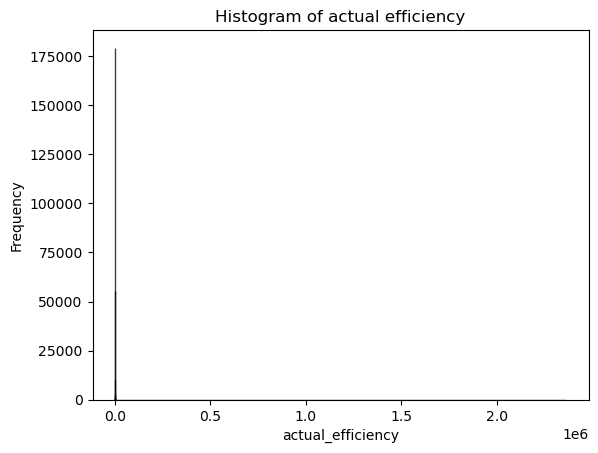

In [43]:
import matplotlib.pyplot as plt

plt.hist(df3['actual_efficiency'], bins=50000, edgecolor='black', alpha=0.75)
plt.xlabel('actual_efficiency')
plt.ylabel('Frequency')
plt.title('Histogram of actual efficiency')
plt.show()


In [ ]:
# # Get the 'style' column from the DataFrame
# style = df3['style'].values

# # Initialize the one-hot encoder
# encoder = OneHotEncoder()

# # Fit the one-hot encoder on the 'style' column
# style_encoded = encoder.fit_transform(style.reshape(-1, 1))

# # Convert the encoded 'style' column back to a DataFrame
# style_df = pd.DataFrame(style_encoded.toarray(), columns=encoder.get_feature_names(['style']))

# # Concatenate the 'style' DataFrame with the original DataFrame
# df3 = pd.concat([df3, style_df], axis=1)

# # Drop the original 'style' column from the DataFrame
# #df3 = df3.drop('style', axis=1)


In [ ]:
# # Create new DataFrames with the encoded columns
# style_df = pd.DataFrame(style_encoded.toarray(), columns=encoder.get_feature_names(['style']))
# # location_df = pd.df3(location_encoded, columns=encoder.get_feature_names(['location']))

# # Concatenate the new DataFrames with the original data
# df3 = pd.concat([df3, style_df], axis=1)

# # Drop the original style and plant_location columns
# df3 = df3.drop('style', axis=1)

In [48]:
X = df3.drop(['line_no','plan_smv','plan_efficiency','location','create_date','line_balance_count','actual_efficiency','date_time'], axis=1)
y = df3['actual_efficiency']


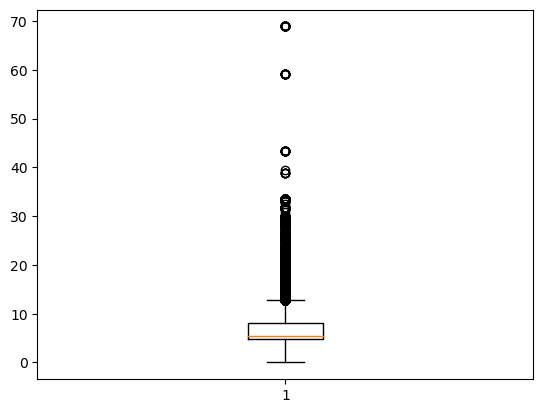

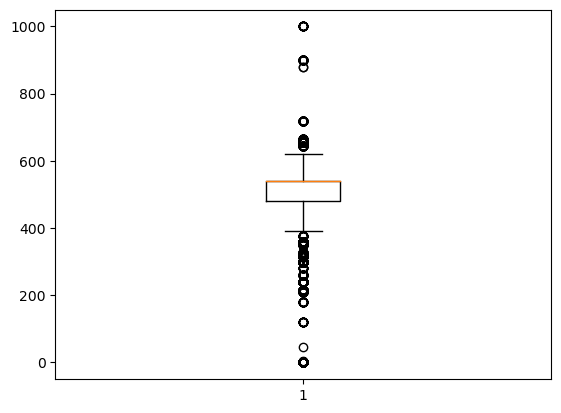

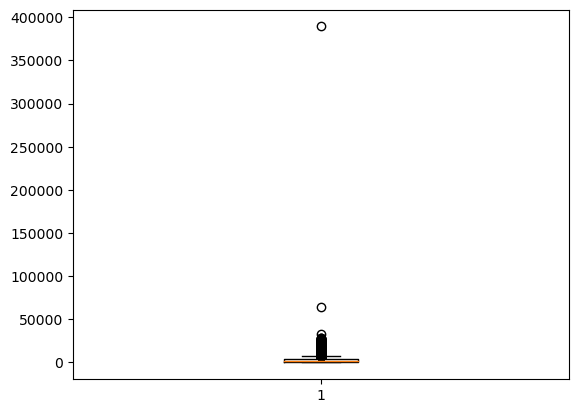

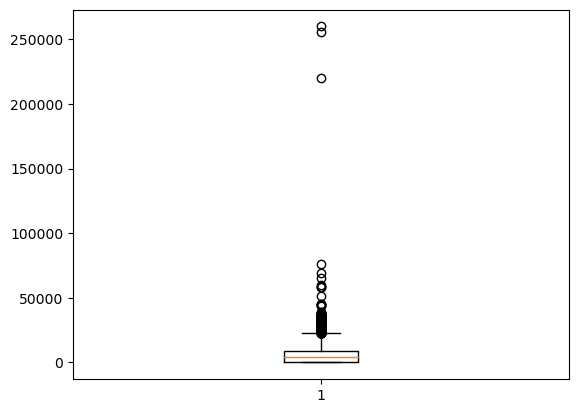

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

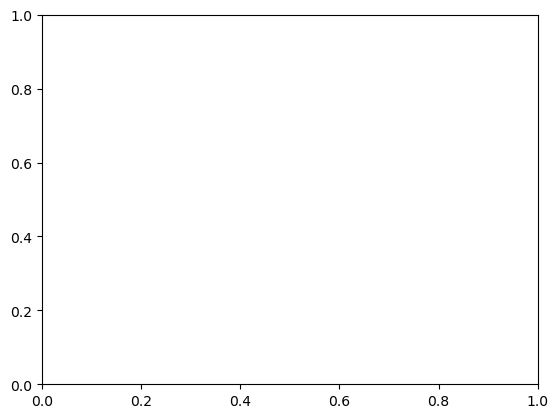

In [46]:
import matplotlib.pyplot as plt
for column in X.columns:
    plt.boxplot(X[column])
    plt.show()
    

In [ ]:
# imputerVariable = SimpleImputer(missing_values='NaN',
#                           strategy = 'most_frequent')
# imputerVariable.fit(X)
# X = imputerVariable.transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Ridge regression model with a regularization strength of 0.5
regressor = Ridge(alpha=0.5)
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [50]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)



In [51]:
# Try using a different regularization strength
regressor = Ridge(alpha=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Try using more or less data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
regressor = Ridge(alpha=0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').